In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# importing required modules 
import string
import re
import numpy as np   
from scipy import spatial
import gensim.downloader as api
import numpy as np

## Load the GloVe model from API

In [3]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-50')

## Example vector representation of a word

In [4]:
glove_model["beautiful"]

array([ 0.54623  ,  1.2042   , -1.1288   , -0.1325   ,  0.95529  ,
        0.040524 , -0.47863  , -0.3397   , -0.28056  ,  0.71761  ,
       -0.53691  , -0.0045698,  0.73217  ,  0.12101  ,  0.28093  ,
       -0.088097 ,  0.59733  ,  0.55264  ,  0.056646 , -0.50247  ,
       -0.63204  ,  1.1439   , -0.31053  ,  0.1263   ,  1.3155   ,
       -0.52444  , -1.5041   ,  1.158    ,  0.68795  , -0.85051  ,
        2.3236   , -0.41789  ,  0.44519  , -0.019216 ,  0.28969  ,
        0.53258  , -0.023008 ,  0.58958  , -0.72397  , -0.85216  ,
       -0.17761  ,  0.14432  ,  0.40658  , -0.52003  ,  0.09081  ,
        0.082961 , -0.021975 , -1.6214   ,  0.34579  , -0.010919 ],
      dtype=float32)

## Nearest neighbours to a point represented by a word vector


In [56]:
glove_model.most_similar("access")

[('provide', 0.8405461311340332),
 ('providing', 0.8398562073707581),
 ('allows', 0.8325700759887695),
 ('allow', 0.8278020024299622),
 ('provides', 0.8090278506278992),
 ('providers', 0.8084705471992493),
 ('existing', 0.7976927757263184),
 ('users', 0.7904787659645081),
 ('secure', 0.7902721762657166),
 ('enabling', 0.7885864973068237)]

## queen - girl + boy = king

In [57]:
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.8660337924957275)]

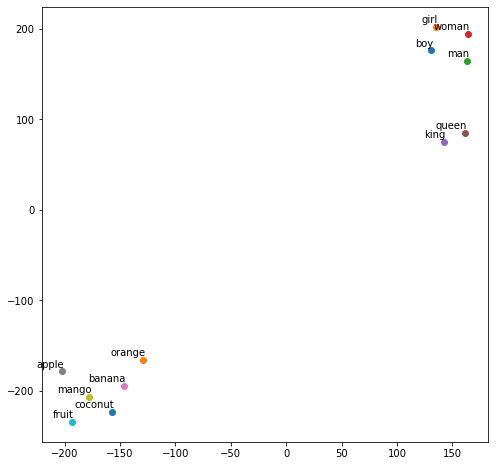

In [59]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)

In [60]:
with open("./stop_words.txt", "r") as f:
  stop_words = f.read().split("\n")

def preprocess_sentence(_sent):
  #  Remove unnecessary characters
  _sent = _sent.replace("?", "")
  _sent = _sent.replace("_", "")
  _sent = _sent.replace(",", "")
  _sent = _sent.replace(".", " ")

  _sent = _sent.lower()
  _sent = _sent.split(" ")
  # Remove Stop words
  _sent = [_word for _word in _sent if _word not in stop_words]
  _sent = [_word for _word in _sent if _word != '']
  print(_sent)
  curr_vects = []
  for _word in _sent:
    try:
      # Uses glove to encode the words into vectors
      curr_vec = glove_model[_word]
      curr_vects.append(curr_vec)
    except:
      pass
  return np.array(curr_vects)

In [85]:
s1 = 'How do you initialize an array in C?'
s2 = 'How do you instantiate an array in Java?'
s3 = 'Which of the following is the correct way to declare a multidimensional array in Java?'
s6 = 'When does the Array Index Out Of Bounds Exception occur?'
s7 = 'Which of the following concepts make extensive use of arrays?'
s8 = 'What are the advantages of arrays?'
s9 = 'What are the disadvantages of arrays?'
s10 = 'Assuming int is of 4 bytes, what is the size of int arr[15];?'
s11 = 'The index of the first element in an array is __________'
s12 = 'Elements in an array are accessed _____________'

all_sent = [s1,s2,s3,s6,s7,s8,s9,s10,s11,s12]
all_vects = []

In [86]:
# Encode all example sentences
for _sent in all_sent:
  curr_vects = preprocess_sentence(_sent)
  all_vects.append(curr_vects)

['initialize', 'array']
['instantiate', 'array', 'java']
['correct', 'declare', 'multidimensional', 'array', 'java']
['array', 'index', 'bounds', 'exception', 'occur']
['concepts', 'make', 'extensive', 'arrays']
['advantages', 'arrays']
['disadvantages', 'arrays']
['assuming', 'int', '4', 'bytes', 'size', 'int', 'arr[15];']
['index', 'element', 'array']
['elements', 'array', 'accessed']


In [87]:
query = 'What are ?'

# Encode query sentence
query_vects = preprocess_sentence(query)

['arrays', 'store']


In [88]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


for i in range(0, len(all_vects)):
  # Fit the query string onto a nearest neighbour space
  nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(all_vects[i])
  # For every sentence calculate pairwise 1st nearest neighbour to every word
  distances, indices = nbrs.kneighbors(query_vects)
  # The distances give us pairwise nearest neighbour between current sentence and query sentence
  # We sum those distances the lower the sum the nearer the meaning of those words (pairwise)
  dist_sum = np.sum(distances)
  print(i," : ", dist_sum)


0  :  9.83812842530277
1  :  9.83812842530277
2  :  9.83812842530277
3  :  9.107830108317406
4  :  5.212837203754224
5  :  6.269545645476196
6  :  7.105904194161589
7  :  9.875635758878275
8  :  9.83812842530277
9  :  9.603473165187046
